# Аппроксимация функций

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

## $$ f(x) = \sin(\frac{x}{5})\cdot e^\frac{x}{10} + 5 e^\frac{-x}{2} $$

Часто суть задачи машинного обучения состоит в том, чтобы по некоторым известным значением приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

## $$ f(x) \approx w_{0} + w_{1} x + w_{2}x^2 ... + w_{n}x^n $$

In [570]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.linalg import solve

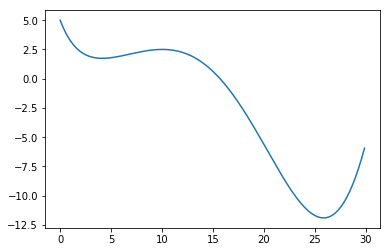

In [571]:
def f0(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
f = np.vectorize(f0)
x = np.arange(0,30,0.1)
plt.plot(x,f(x))

Как известно, многочлен степени n однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты можно определить из следующей системы линейных уравнений:

### $$ А\vec{w} = \vec{b} $$

\begin{equation}
\begin{pmatrix} 1 & x_{0} & x_{0}^2 & \dots  & x_{0}^n \\
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^n \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n} & x_{n}^2 & \dots  & x_{n}^n  
\end{pmatrix} 
\begin{pmatrix} w_{0} \\ w_{1} \\\dots \\ w_{n}
\end{pmatrix}
=
\begin{pmatrix}
f(x_{0}) \\ 
f(x_{1}) \\
\dots \\
f(x_{n}) 
\end{pmatrix}
\end{equation}
<br/> 
<br/> 
Где $ x_{0},x_{1},...,x_{n} $ - некоторые опорные точки

In [574]:
points = np.array([1,4,7,15,27])
b = f(points)
b

array([  3.25221687,   1.74684595,   2.13543898,   0.63522142, -11.49852141])

In [572]:
def matrix_build(n,points):
    init = np.ones((n,1))
    for i in range(1,n):
        init = np.column_stack((init,points**i))
    return (init)    

In [573]:
def polynomial_creator(*coefficients):
    """ coefficients are in the form a_0, a_1, ... a_n 
    """
    def polynomial(x):
        res = 0
        for index, coeff in enumerate(coefficients):
            res += coeff * x** index
        return res
    return polynomial

In [575]:
A = matrix_build(len(points),points)

In [576]:
w = solve(A,b)
w

array([  4.58896210e+00,  -1.61436985e+00,   2.96236432e-01,
        -1.89594067e-02,   3.47587305e-04])

In [577]:
check = np.dot(A,w)
residual = check -b
print (residual)

[ -4.44089210e-16   8.88178420e-16  -4.44089210e-15  -9.76996262e-15
  -1.24344979e-13]


In [578]:
p = polynomial_creator(*w[:])
y_apr = [p(x) for x in x ]

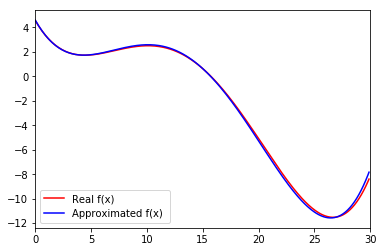

In [579]:
plt.figure(1)
plt.xlim([0,30])
plt.plot(x,y,'r-')
plt.plot(x,y_apr,'b-')
plt.legend(['Real f(x)', 'Approximated f(x) '], loc='lower left')


### При увеличении кол-ва точек степень полинома увеличивается и качество апроксимации соответственно улучшается.